In [1]:
import os
import numpy as np
import pandas as pd

# plotting modules
import matplotlib.colors as colors
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

/data5/deepro/miniconda3/envs/starrseq/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [3]:
def get_deseq2_outfile(store_dir, ko):
    deseq_outfile = os.path.join(store_dir, f"{ko}vsCC", "de_results.csv")
    return deseq_outfile

def get_de_results(filename):
    de_df = pd.read_csv(filename)
    return de_df
 

In [4]:
store_dir = "../data/results/de/"
ko_lines = ["ATF2", "CTCF", "FOXA1", "LEF1", "SCRT1", "TCF7L2", "16P12_1"]

In [5]:
def create_ko_df(store_dir, ko_lines):
    data_dict = {"DE":[], "UP":[], "DOWN":[]}
    for ko in ko_lines:
        deseq_file = get_deseq2_outfile(store_dir, ko)
        de_df = get_de_results(deseq_file)
        sig_df = de_df.loc[de_df.padj<0.05]
        de_percent = round(len(sig_df)*100/len(de_df), 3)
        up = len(sig_df.loc[sig_df.log2FoldChange>=0])
        down = len(sig_df.loc[sig_df.log2FoldChange<0])
        data_dict["DE"].append(de_percent)
        data_dict["UP"].append(up)
        data_dict["DOWN"].append(down)
    df = pd.DataFrame(data=data_dict)
    df["library"] = ko_lines
    return df

In [6]:
response_df = create_ko_df(store_dir, ko_lines[:-1])

# Percent DE

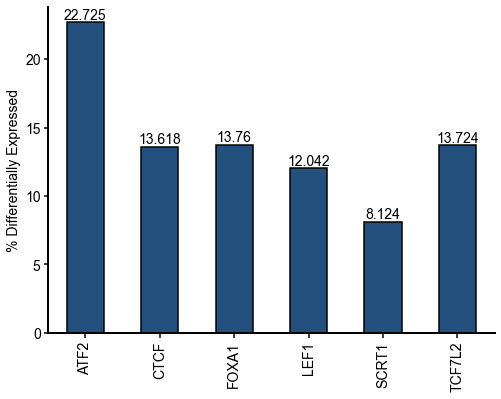

In [7]:
fig, axes = plt.subplots(figsize=(8,6))

g = sns.barplot(
    data=response_df, x="library", y=f"DE", palette=["#15508d"],  #
    log=False, ax=axes, edgecolor="k", linewidth=1.5)

g.axes.set_xticklabels(g.axes.get_xticklabels(), rotation=90)

# Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths

# Set these based on your column counts
columncounts = [5 for i in range(len(ko_lines[:-1]))]

widthbars = normaliseCounts(columncounts,10)

for bar,newwidth in zip(axes.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2.

    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)

for i in g.containers:
    g.bar_label(i,);

axes.spines[["right", "top"]].set_visible(False)
axes.set_xlabel("")
axes.set_ylabel(f"% Differentially Expressed");

In [8]:
save_file = "../data/figures/percent_de_genes.pdf"
save_pdf(save_file, fig)

# Up and downregulated

In [9]:
plot_df = response_df.melt(id_vars=["library"], value_vars=["DOWN", "UP"], var_name="DE type", value_name="Gene count")

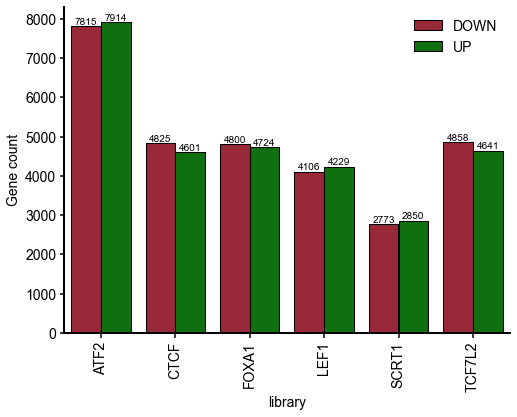

In [10]:
fig, axes = plt.subplots(figsize=(8,6))

g = sns.barplot(
    data=plot_df, x="library", y="Gene count", 
    hue="DE type", palette=["#ab162a", "green"], hue_order=["DOWN", "UP"],  #
    log=False, ax=axes, edgecolor="k", linewidth=1.05)

g.axes.set_xticklabels(g.axes.get_xticklabels(), rotation=90)

for i in g.containers:
    g.bar_label(i,fontsize=10);

axes.spines[["right", "top"]].set_visible(False)
axes.legend(frameon=False)

In [11]:
save_file = "../data/figures/updown_de_genes.pdf"
save_pdf(save_file, fig)